### Surprise House Case Study

### Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

### Business Goal

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Step 1 : Get Data

In [3]:
housingData  = pd.read_csv("train.csv")
housingData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
## Data Information
housingData.info()
# The provided dataset consists of 1460 entries (rows) and 81 columns. 
# The dataset includes a combination of float, integer, and object data types. It doe contain any missing values in
# different columns,as indicated by the "Non-Null Count" for all columns vs the total counts of rows available.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
housingData.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
housingDataTemp = housingData;
housingData = housingDataTemp.drop("Id",axis=1,inplace=False)
housingData.shape

(1460, 80)

In [7]:
# Separating the Numerical and Categorical features for analysis
numColumns = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF',
             '2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch'
              ,'3SsnPorch','ScreenPorch','PoolArea','MiscVal']
print(numColumns)
housingData[numColumns].describe()

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,1201.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041
std,24.284752,9981.264932,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,59.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,80.000000,11601.500000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000


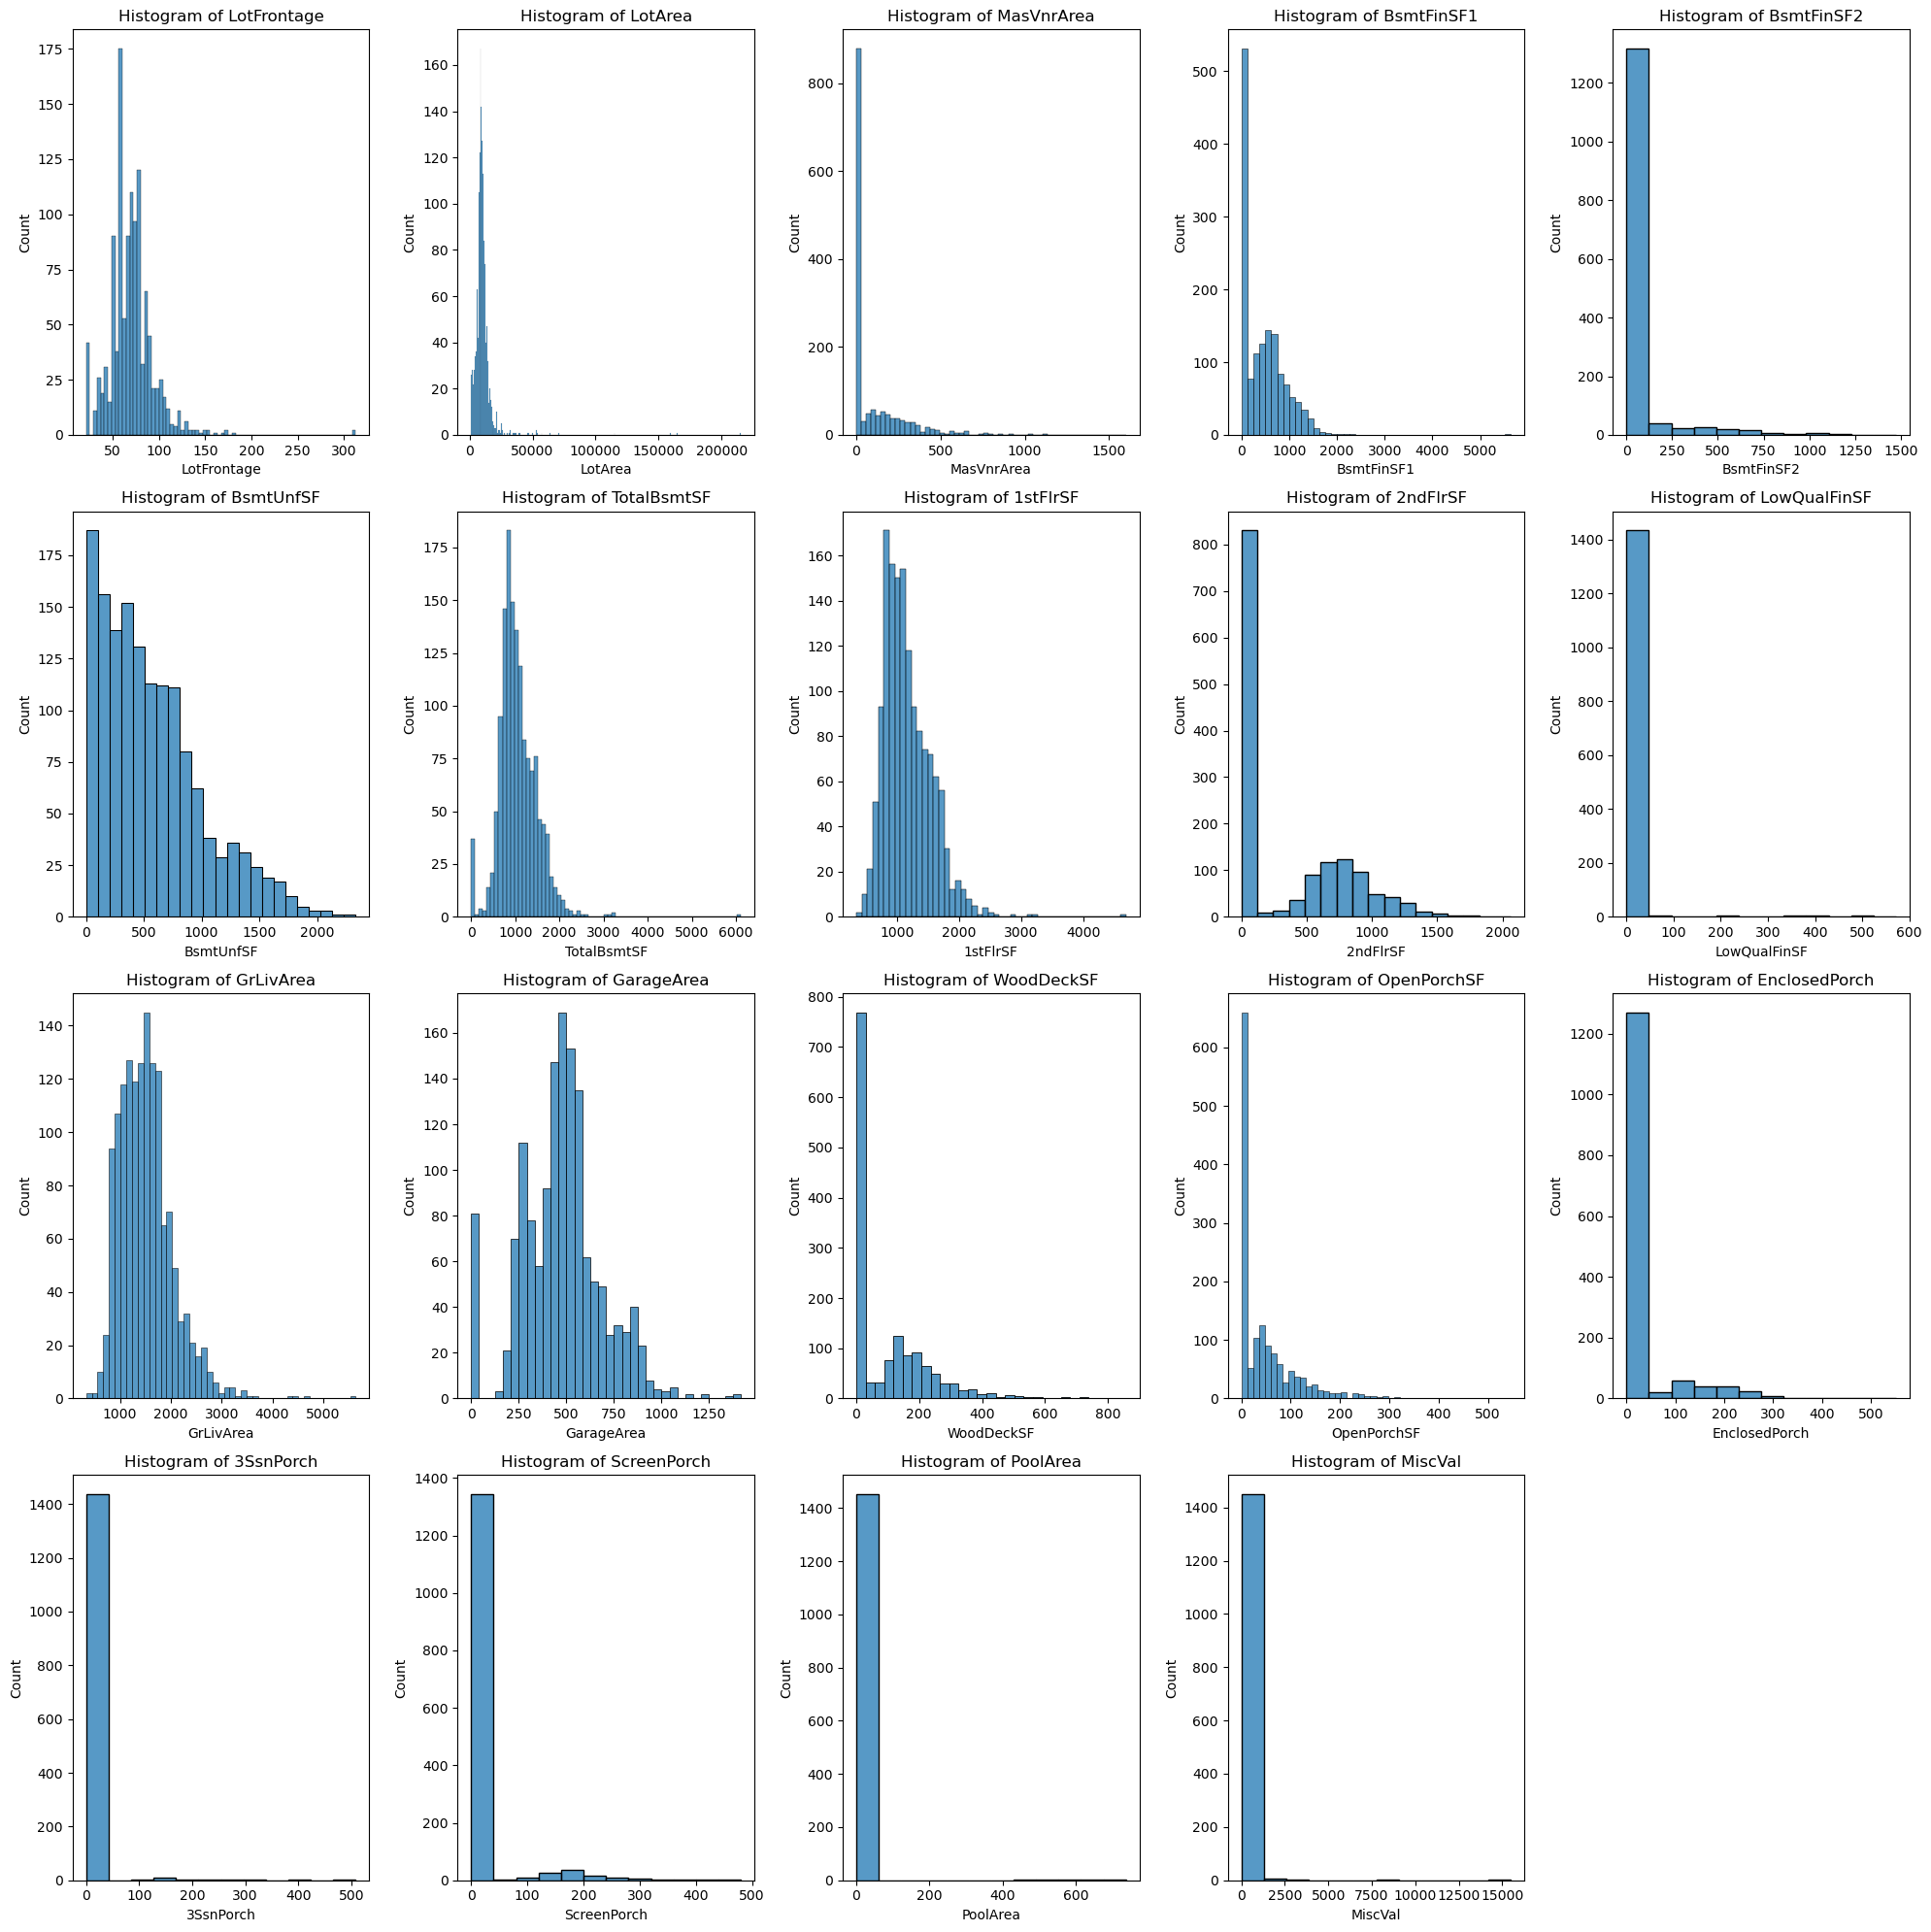

In [8]:
# Lets First Look the distribution of the numerical
# Calculate the number of rows and columns needed
num_columns = 5
num_rows = math.ceil(len(housingData[numColumns].columns) / num_columns)

# Create the subplot grid
fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, num_columns*num_rows))

# Iterate over each column and create a separate histogram
for i, column in enumerate(housingData[numColumns].columns):
    row = i // num_columns
    col = i % num_columns
    
    # Select the appropriate subplot
    if num_rows > 1:
        ax = axes[row][col]
    else:
        ax = axes[col]
    
    # Create the histogram using seaborn
    sns.histplot(data=housingData[numColumns], x=column, ax=ax)
    ax.set_title(f'Histogram of {column}')

# Remove any empty subplots
if len(housingData[numColumns].columns) < num_rows * num_columns:
    empty_subplots = num_rows * num_columns - len(housingData[numColumns].columns)
    if num_rows > 1:
        for i in range(empty_subplots):
            fig.delaxes(axes[-1][-1-i])
    else:
        for i in range(empty_subplots):
            fig.delaxes(axes[-1-i])

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


- Looking at the histogram of above columns , it seems that few of the fields have data skewed toward one side  or in an uneven pattern
- Few of the columns seems to have max records pointed towards single value , we need to look indepth for 
 such cols top understand and take relevant action :
- ['LowQualFinSF',3SsnPorch','ScreenPorch','PoolArea','MiscVal']

In [9]:
skewedCols = ['LowQualFinSF', '3SsnPorch','ScreenPorch','EnclosedPorch',
                            'PoolArea','BsmtFinSF2','BsmtHalfBath', 'MiscVal']
for column in skewedCols:
    value_counts = housingData[column].value_counts(normalize=True)
    highest_percentage = value_counts.max()
    highest_percentage_values = value_counts[value_counts == highest_percentage].index
    print(f"For column '{column}':")
    print(f"Highest percentage: {highest_percentage}")
    print(f"Value with highest percentage: {highest_percentage_values}")
    print()

For column 'LowQualFinSF':
Highest percentage: 0.9821917808219178
Value with highest percentage: Int64Index([0], dtype='int64')

For column '3SsnPorch':
Highest percentage: 0.9835616438356164
Value with highest percentage: Int64Index([0], dtype='int64')

For column 'ScreenPorch':
Highest percentage: 0.9205479452054794
Value with highest percentage: Int64Index([0], dtype='int64')

For column 'EnclosedPorch':
Highest percentage: 0.8575342465753425
Value with highest percentage: Int64Index([0], dtype='int64')

For column 'PoolArea':
Highest percentage: 0.9952054794520548
Value with highest percentage: Int64Index([0], dtype='int64')

For column 'BsmtFinSF2':
Highest percentage: 0.8856164383561644
Value with highest percentage: Int64Index([0], dtype='int64')

For column 'BsmtHalfBath':
Highest percentage: 0.9438356164383561
Value with highest percentage: Int64Index([0], dtype='int64')

For column 'MiscVal':
Highest percentage: 0.9643835616438357
Value with highest percentage: Int64Index([0]

In [10]:
# It is visible that maximum records of these columns are of 0 value and would not add any value to our model , we need to drop 
# them 
housingDataTemp = housingData
numColumns = [col for col in numColumns if col not in skewedCols] 
housingData = housingDataTemp.drop(skewedCols,axis=1 , inplace=False)
housingData.shape

(1460, 72)

## Step 2  :  Missing Values

In [11]:
def getPercentageWithMissingValues(housingData):
    columnsWithMissingValue = (housingData.isnull().sum() / housingData.isnull().count()*100).sort_values(ascending = False) 
    columnsWithMissingValue =columnsWithMissingValue[columnsWithMissingValue>0]
    return columnsWithMissingValue

In [12]:
## Lets first Capture all columns with na values  
columnsWithNa = getPercentageWithMissingValues(housingData)
print(columnsWithNa)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
GarageType       5.547945
GarageYrBlt      5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtCond         2.534247
BsmtQual         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64


In [13]:
## Lets look each of the columns distinct values to understand what type of values are present in differnt columns
for column in columnsWithNa.index:
    distinct_values = housingData[column].unique()
    print(f"Distinct values in {column}: {distinct_values}")

Distinct values in PoolQC: [nan 'Ex' 'Fa' 'Gd']
Distinct values in MiscFeature: [nan 'Shed' 'Gar2' 'Othr' 'TenC']
Distinct values in Alley: [nan 'Grvl' 'Pave']
Distinct values in Fence: [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
Distinct values in FireplaceQu: [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
Distinct values in LotFrontage: [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
Distinct values in GarageFinish: ['RFn' 'Unf' 'Fin' nan]
Distinct values in GarageQual: ['TA' 'Fa' 'Gd' nan 'Ex' 'Po']


In [14]:
# If you look at the above distinct values, it is visible that there is nan category in few of the columns which actually 
# is one of the values specified based on Data Dictionary but labelling them NA makes them counted as empty values

# NA mentioned for GarageFinish, GarageQual,GarageCond, GarageType is No Garage 
# NA mentioned for PoolQC is No Pool  
# NA mentioned for Fence is No Fence  
# NA mentioned for MiscFeature is None  
# NA mentione for Alley is No Alley Access   
# NA mentioned for FireplaceQu is No Fireplace
# NA mentioned for BsmtFinType2,BsmtExposure,BsmtFinType1,BsmtQual,BsmtCond is No Basement     

# All the Above columns NA Value can be represented as None for our Purpose , lets do it 
columnsValuetoReplace = ['GarageFinish','GarageQual','GarageCond','GarageType',
                         'BsmtFinType2','BsmtExposure','BsmtFinType1','BsmtQual','BsmtCond'
                         ,'PoolQC','Fence','MiscFeature','Alley','FireplaceQu']
housingData[columnsValuetoReplace] = housingData[columnsValuetoReplace].applymap(lambda x: 'None' if pd.isna(x) else x)

# Numeric Field , so need to be set as 0. This is specified Na for cases where garage does not exist

housingData['GarageYrBlt'] = housingData['GarageYrBlt'].apply(lambda x: 0 if pd.isna(x) else x)


#For LotFrontage , it is Linear feet of street connected to property and can be considered as 0 if no value present
housingData['LotFrontage'] = housingData['LotFrontage'].apply(lambda x: 0 if pd.isna(x) else x)
# For MasVnrType,MasVnrArea since the records are too small and there is a value of 'None' mentioned for them 
# in data dictiory , lets put the same as the missing value 
housingData['MasVnrType'] = housingData['MasVnrType'].apply(lambda x: 'None' if pd.isna(x) else x)
housingData['MasVnrArea'] = housingData['MasVnrArea'].apply(lambda x: 0 if pd.isna(x) else x)
# For Electrical , we will input median value as missing value
housingData['Electrical'] = housingData['Electrical'].fillna(housingData['Electrical'].mode().iloc[0])

## Checking again Missing Values
getPercentageWithMissingValues(housingData)
## No Missing Value Found

Series([], dtype: float64)

## Step 3 : Identify Outliers

In [15]:
len(housingData[numColumns].columns)

12

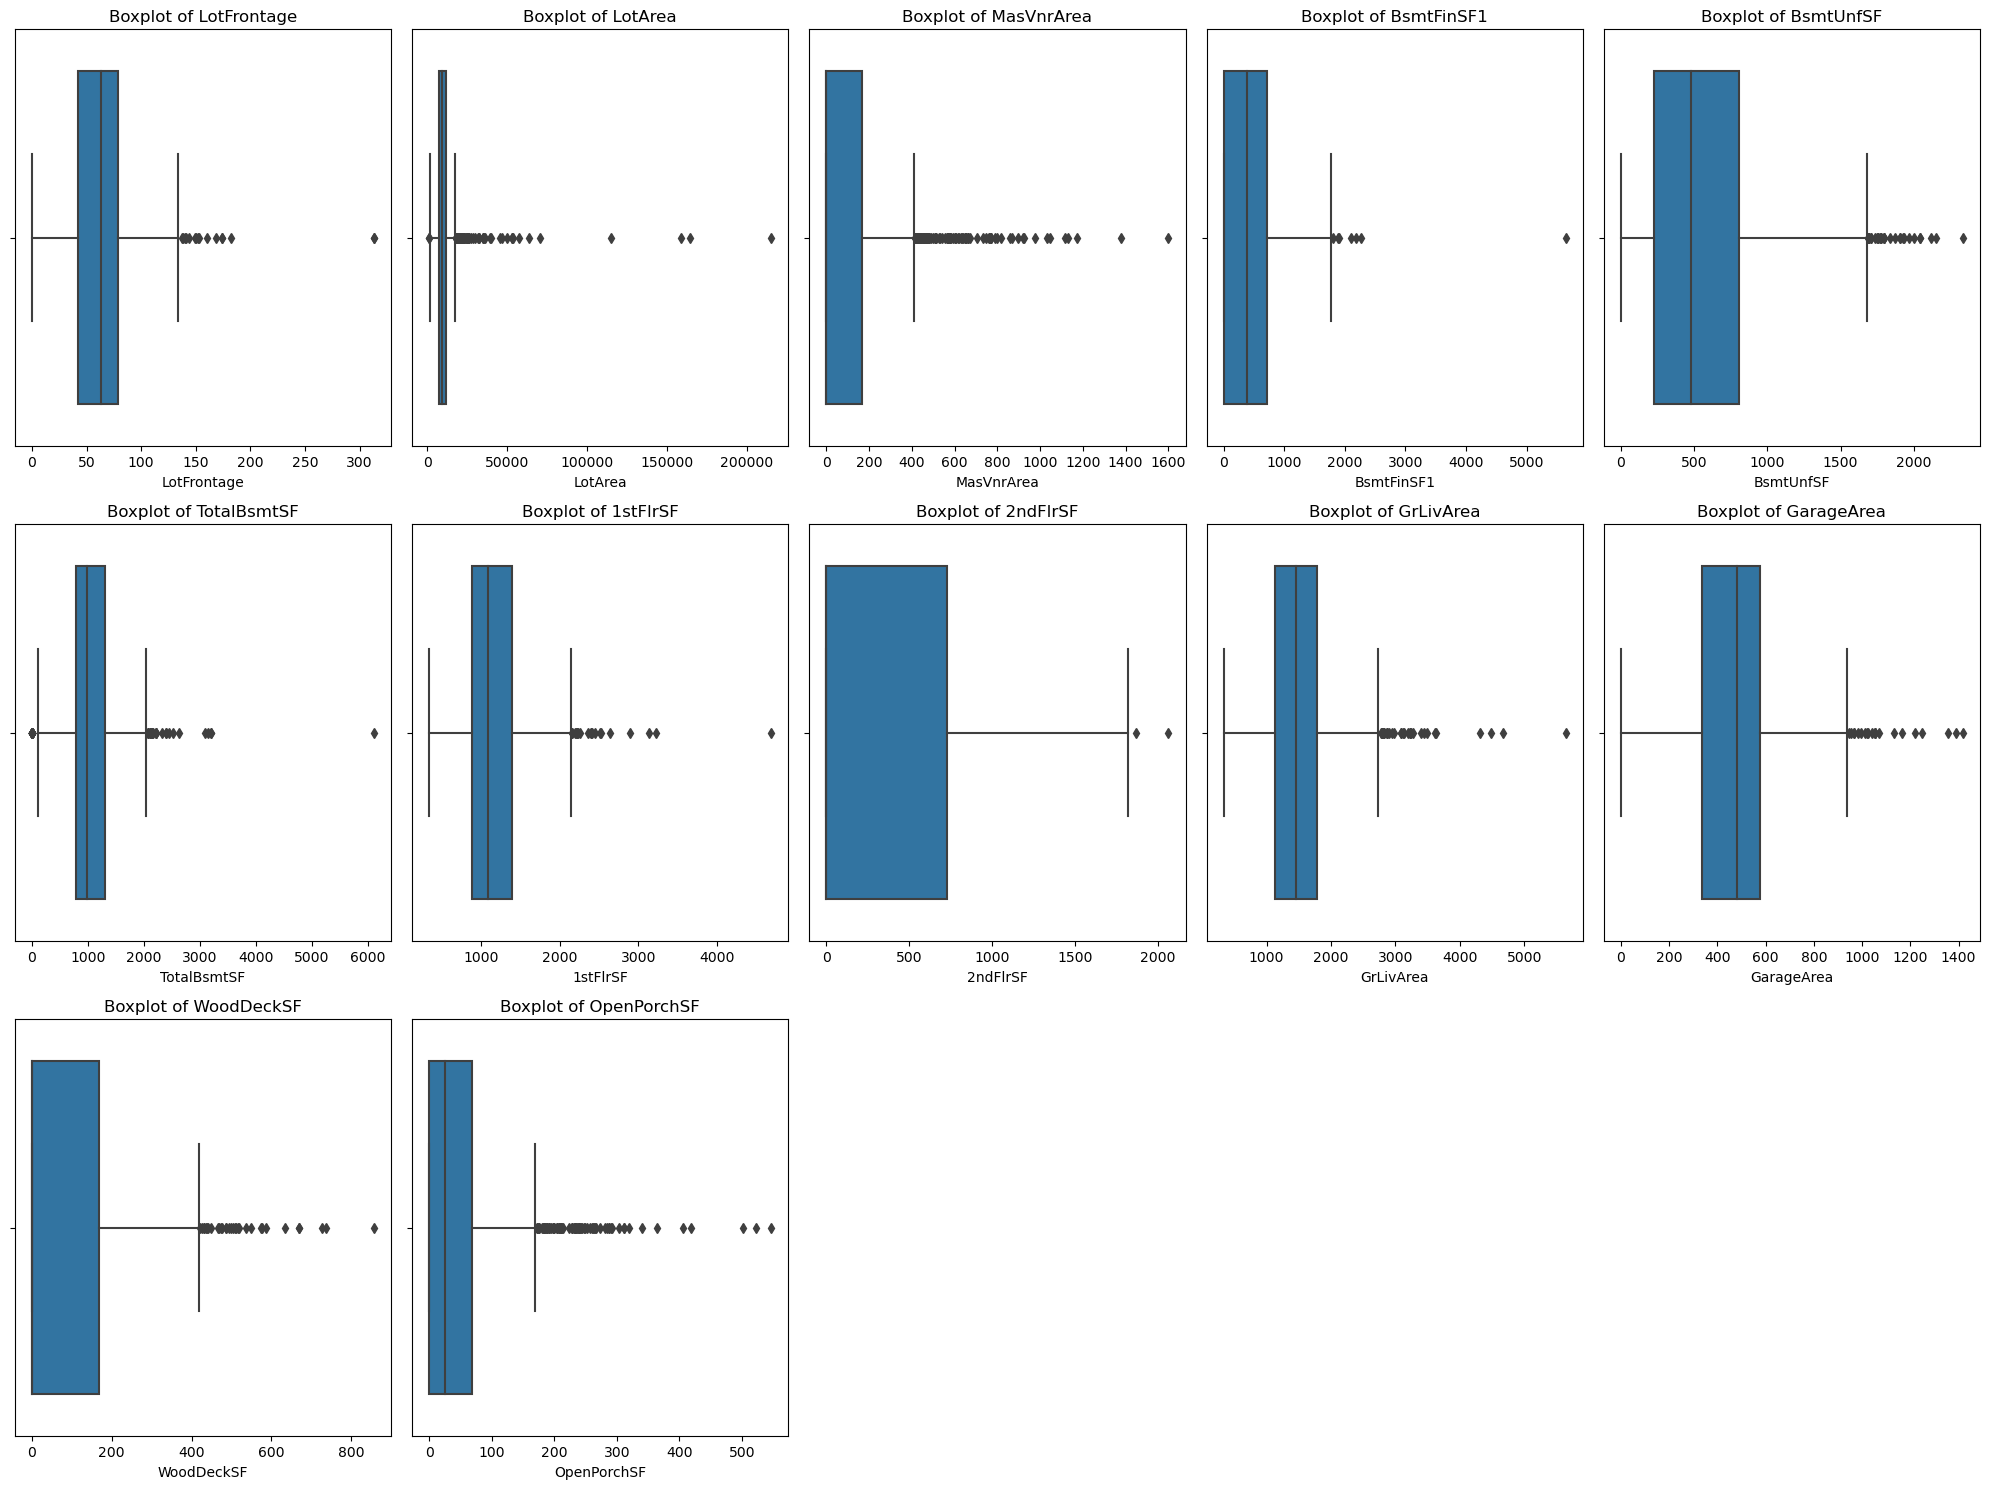

In [16]:
# Lets try to identify outliers using box plot
# Calculate the number of rows and columns needed
num_columns = 5
num_rows = math.ceil(len(housingData[numColumns].columns) / num_columns)

# Create the subplot grid
fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, num_columns*num_rows))

# Iterate over each column and create a separate boxplot
for i, column in enumerate(housingData[numColumns].columns):
    row = i // num_columns
    col = i % num_columns
    
    # Select the appropriate subplot
    if num_rows > 1:
        ax = axes[row][col]
    else:
        ax = axes[col]
    
    # Create the boxplot using seaborn
    sns.boxplot(data=housingData[numColumns], x=column, ax=ax)
    ax.set_title(f'Boxplot of {column}')

# Remove any empty subplots
if len(housingData[numColumns].columns) < num_rows * num_columns:
    empty_subplots = num_rows * num_columns - len(housingData[numColumns].columns)
    if num_rows > 1:
        for i in range(empty_subplots):
            fig.delaxes(axes[-1][-1-i])
    else:
        for i in range(empty_subplots):
            fig.delaxes(axes[-1-i])

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

 - Since there are a lot of fields , its tough to see them individually for identifying the outliers but looking at the  charts above , it seems true that there are outliers that needs to be identified and fix 

In [17]:
outliers_percentage={}

for feature in housingData[numColumns].columns:
    Q1 = np.nanquantile(housingData[feature], 0.25)
    Q3 = np.nanquantile(housingData[feature], 0.75)
    IQR = Q3 - Q1    
    outliers_count = housingData[(housingData[feature] > (Q3 + 1.5 * IQR))
                                 | (housingData[feature] < (Q1 - 1.5 * IQR))].shape[0]
    outliers_percentage[feature]=round(outliers_count/housingData.shape[0]*100,2)

outlier_df = pd.DataFrame({'Features': list(outliers_percentage.keys()), 'Percentage': list(outliers_percentage.values())})
outlier_df.sort_values(by="Percentage", ascending=False, inplace=True)
outlier_df = outlier_df[outlier_df['Percentage']>0]
print(outlier_df)

       Features  Percentage
2    MasVnrArea        6.71
11  OpenPorchSF        5.27
1       LotArea        4.73
5   TotalBsmtSF        4.18
10   WoodDeckSF        2.19
8     GrLivArea        2.12
4     BsmtUnfSF        1.99
9    GarageArea        1.44
6      1stFlrSF        1.37
0   LotFrontage        1.10
3    BsmtFinSF1        0.48
7      2ndFlrSF        0.14


- Since majority of the fields have outliers , we will change max and min value based onthe range of ( 25th percentile - 1.5 * IQR, 75th percentile + 1.5 * IQR )

In [18]:
for feature,percentage in outliers_percentage.items():
        IQR = housingData[feature].quantile(.75) - housingData[feature].quantile(.25) 
        max_value = housingData[feature].quantile(.75)+1.5*IQR
        min_value = housingData[feature].quantile(.25)-1.5*IQR
        housingData[feature][housingData[feature] > max_value] = max_value
        housingData[feature][housingData[feature] < min_value ] = min_value

housingData[numColumns].describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,57.187671,9647.388014,89.406336,439.997517,563.777740,1050.254795,1157.018151,346.789041,1503.735873,470.670719,91.806849,42.603425
std,32.938522,3594.356399,134.017553,433.219435,431.710214,397.937878,362.583002,435.791621,481.375641,207.105729,116.658120,52.501584
min,0.000000,1481.500000,0.000000,0.000000,0.000000,42.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000
25%,42.000000,7553.500000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,1129.500000,334.500000,0.000000,0.000000
50%,63.000000,9478.500000,0.000000,383.500000,477.500000,991.500000,1087.000000,0.000000,1464.000000,480.000000,0.000000,25.000000
75%,79.000000,11601.500000,164.250000,712.250000,808.000000,1298.250000,1391.250000,728.000000,1776.750000,576.000000,168.000000,68.000000
max,134.500000,17673.500000,410.625000,1780.625000,1685.500000,2052.000000,2155.125000,1820.000000,2747.625000,938.250000,420.000000,170.000000


## Step 4 -  Understanding Correlation for Numerical Fields

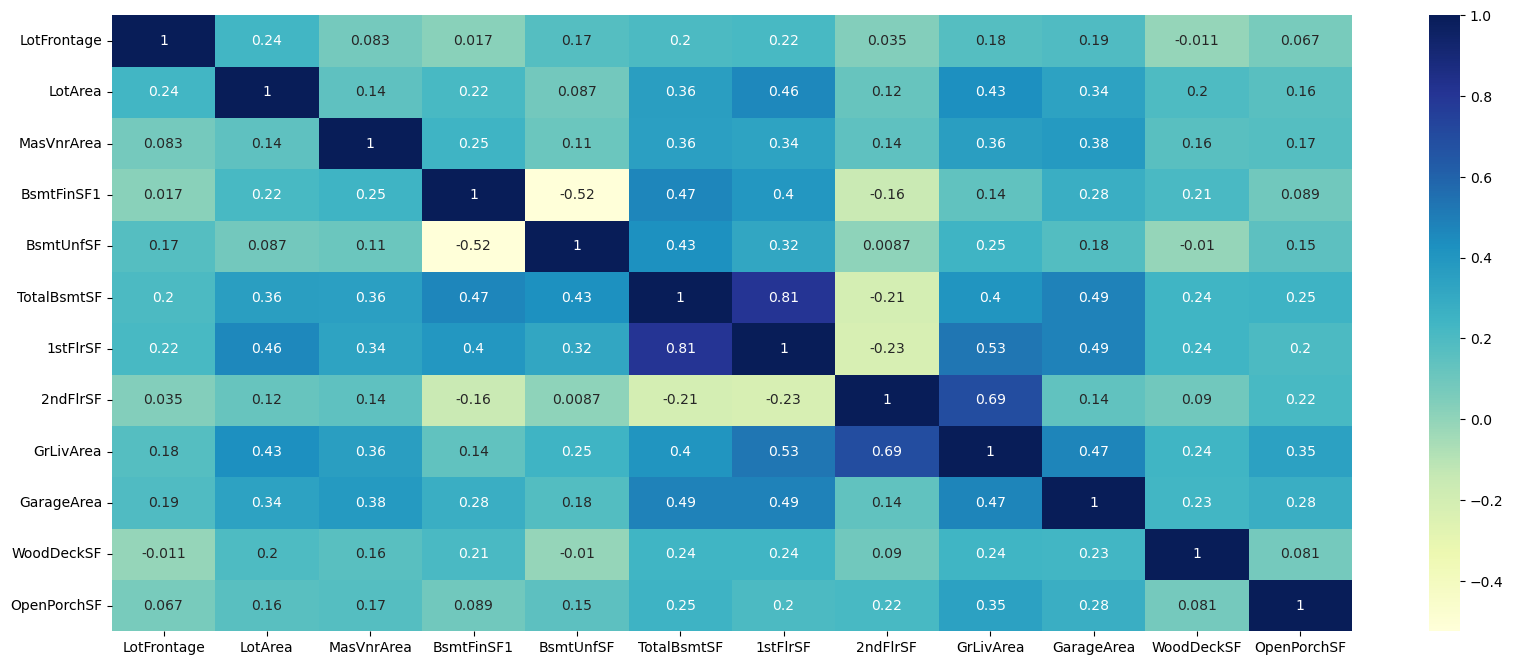

In [19]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.heatmap(housingData[numColumns].corr(),annot=True,cmap="YlGnBu",ax=ax)
plt.show()

In [20]:
import numpy as np

# Create the correlation matrix
correlation_matrix = housingData[numColumns].corr()

# Get the indices of correlations higher than 0.8
row_indices, col_indices = np.where(np.abs(correlation_matrix) > 0.8)

# Create a list of correlated feature pairs and their values
correlated_features = []
for i in range(len(row_indices)):
    if row_indices[i] != col_indices[i]:
        feature1 = correlation_matrix.index[row_indices[i]]
        feature2 = correlation_matrix.columns[col_indices[i]]
        correlation_value = correlation_matrix.iloc[row_indices[i], col_indices[i]]
        correlated_features.append((feature1, feature2, correlation_value))

# Print the correlated feature pairs and their values
for feature1, feature2, correlation_value in correlated_features:
    print(f"Correlated features: {feature1} and {feature2} (Correlation value: {correlation_value})")


Correlated features: TotalBsmtSF and 1stFlrSF (Correlation value: 0.8071577034861669)
Correlated features: 1stFlrSF and TotalBsmtSF (Correlation value: 0.8071577034861669)


In [21]:
# Lets drop one of the above Features to remove correlations 
# TotalBsmtSF and 1stFlrSF  , This is basement Sq ft area and IstFloor Sq Ft Area , keeping TotalBsmtSF  
featuresToRemove = ['1stFlrSF']
numColumns = [col for col in numColumns if col not in featuresToRemove]
housingDataTemp = housingData
housingData = housingDataTemp.drop(featuresToRemove, axis=1,inplace=False)
housingData.shape

(1460, 71)

### Derived Column 

## Step 5  Univariate Analysis

### Grouping Columns

We can classify all the information provided in below groups and will be picking few of the groups that seems to be important 
for doing the analysis

- Group 1: Dwelling Information
    - MSSubClass
    - BldgType
    - HouseStyle

- Group 2: Location Information
    - MSZoning
    - Neighborhood

- Group 3: Lot Information
    - LotFrontage
    - LotArea
    - LotShape

- Group 4: Road and Alley Access
    - Street
    - Alley

- Group 5: Property Shape and Contour
    - LandContour
    - LotConfig
    - LandSlope

- Group 6: Utilities and Heating
    - Utilities
    - Heating
    - HeatingQC

- Group 7: Building Exterior
    - Exterior1st
    - Exterior2nd
    - MasVnrType
    - MasVnrArea
    - ExterQual
    - ExterCond

- Group 8: Basement Information
    - BsmtQual
    - BsmtCond
    - BsmtExposure
    - BsmtFinType1
    - BsmtFinSF1
    - BsmtFinType2
    - BsmtFinSF2
    - BsmtUnfSF
    - TotalBsmtSF

- Group 9: Garage Information
    - GarageType
    - GarageYrBlt
    - GarageFinish
    - GarageCars
    - GarageArea
    - GarageQual
    - GarageCond

- Group 10: Other Features
    - PoolArea
    - PoolQC
    - Fence
    - MiscFeature
    - MiscVal

- Group 11: Sales Information
    - MoSold
    - YrSold
    - SaleType
    - SaleCondition


In [22]:
housingData.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'PoolQC',
       'Fence', 'MiscFeature'

In [23]:
def create_grouped_bar_chart(column_data_list, title_list):
    
    num_columns = 3
    num_rows = (len(column_data_list) + num_columns - 1) // num_columns

    # Set up the figure and axis
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, 8))
    axes = axes.flatten()  # Flatten the axes array

    # Iterate over each column data and title
    for i, (column_data, title) in enumerate(zip(column_data_list, title_list)):
        # Count the occurrences of each value
        value_counts = column_data.value_counts()

        # Extract the unique labels and their counts
        labels = value_counts.index.tolist()
        counts = value_counts.values.tolist()

        # Select the appropriate subplot
        ax = axes[i]

        # Create the bar chart
        ax.bar(labels, counts)

        # Set the axis labels and title
        ax.set_xlabel('Categories')
        ax.set_ylabel('Count')
        ax.set_title(title)

        # Rotate x-axis labels if needed
        ax.tick_params(axis='x', rotation=90)

    # Adjust the layout and display the plot
    plt.tight_layout()
    plt.show()

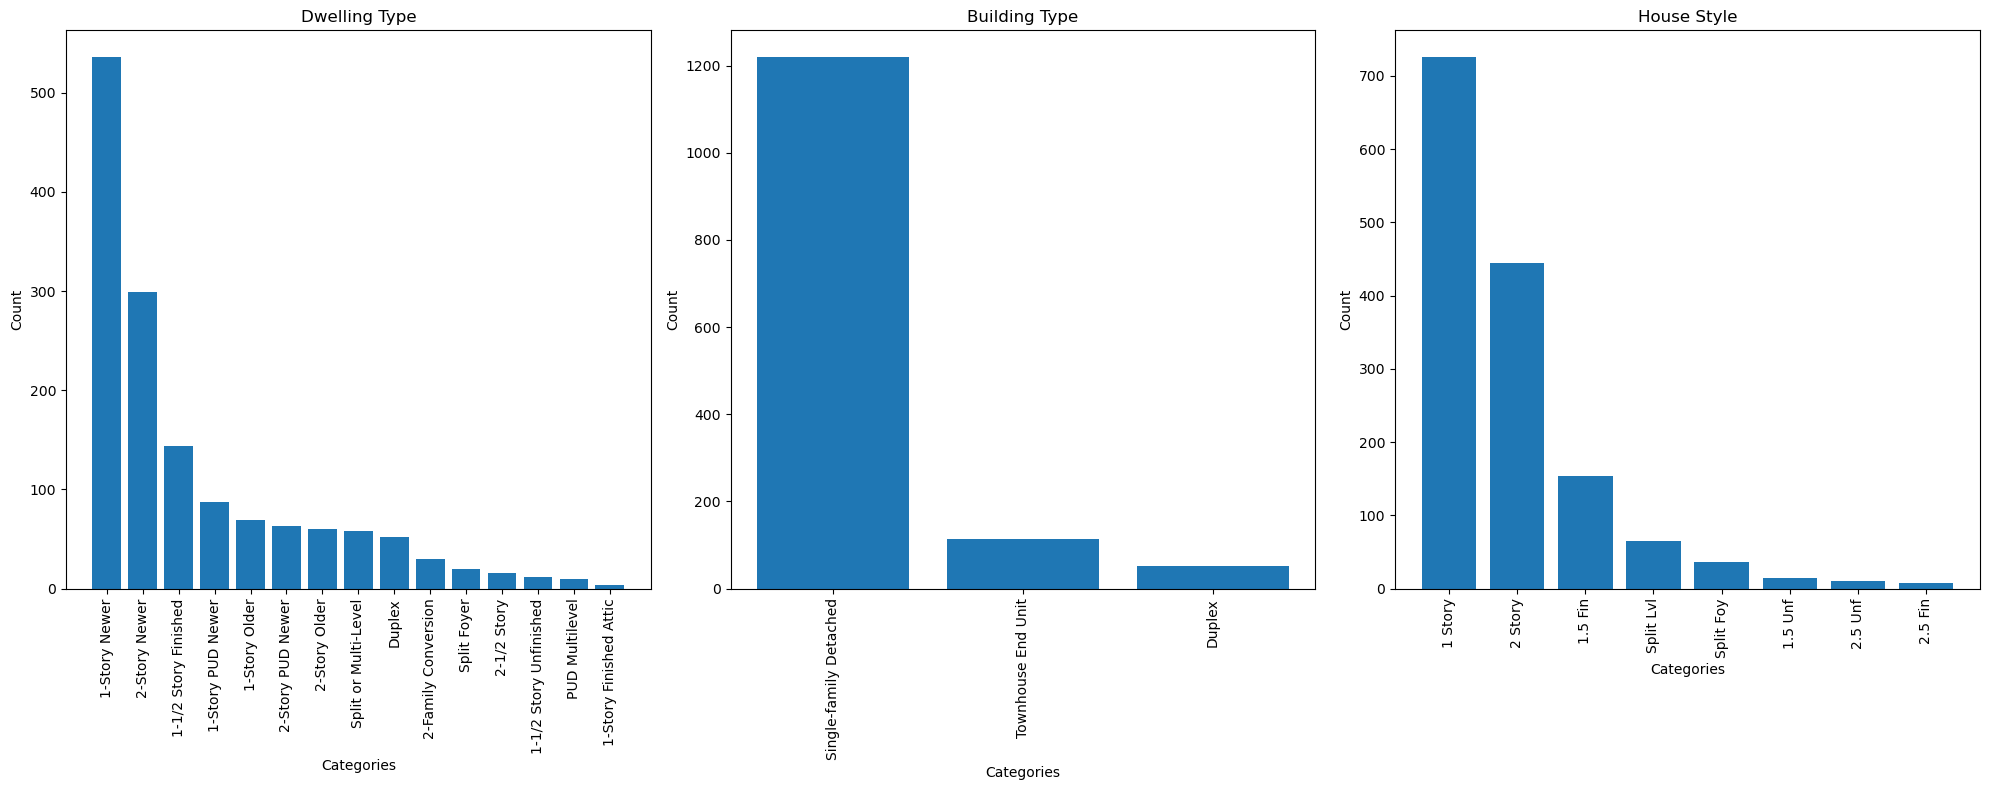

In [24]:
# Group 1: Dwelling Information : MSSubClass , BldgType, HouseStyle
housingData['MSSubClass'] = housingData['MSSubClass'].astype(str).map({
   "20": "1-Story Newer",
    "30": "1-Story Older",
    "40": "1-Story Finished Attic",
    "45": "1-1/2 Story Unfinished",
    "50": "1-1/2 Story Finished",
    "60": "2-Story Newer",
    "70": "2-Story Older",
    "75": "2-1/2 Story",
    "80": "Split or Multi-Level",
    "85": "Split Foyer",
    "90": "Duplex",
    "120": "1-Story PUD Newer",
    "150": "1-1/2 Story PUD",
    "160": "2-Story PUD Newer",
    "180": "PUD Multilevel",
    "190": "2-Family Conversion",
}) 
housingData['BldgType'] = housingData['BldgType'].astype(str).map({
   '1Fam': 'Single-family Detached',
    '2FmCon': 'Two-family Conversion; originally built as one-family dwelling',
    'Duplex': 'Duplex',
    'TwnhsE': 'Townhouse End Unit',
    'TwnhsI': 'Townhouse Inside Unit'
}) 
housingData['HouseStyle'] = housingData['HouseStyle'].astype(str).map({
   '1Story': '1 Story',
    '1.5Fin': '1.5 Fin',
    '1.5Unf': '1.5 Unf',
    '2Story': '2 Story',
    '2.5Fin': '2.5 Fin',
    '2.5Unf': '2.5 Unf',
    'SFoyer': 'Split Foy',
    'SLvl': 'Split Lvl'
}) 

create_grouped_bar_chart(
                        [housingData['MSSubClass'],housingData['BldgType'],housingData['HouseStyle']], 
                         ["Dwelling Type" , "Building Type","House Style"]
                        )


In [25]:
 
housingData['MSZoning'] = housingData['MSZoning'].astype(str).map({
   'A': 'Agriculture',
    'C': 'Commercial',
    'FV': 'Floating Village Residential',
    'I': 'Industrial',
    'RH': 'Residential High Density',
    'RL': 'Residential Low Density',
    'RP': 'Residential Low Density Park',
    'RM': 'Residential Medium Density'
})

housingData['Street'] = housingData['Street'].astype(str).map({
   'Grvl': 'Gravel',
    'Pave': 'Paved',
    'NA': 'No alley access'
})

housingData['Alley'] = housingData['Alley'].astype(str).map({
   'Grvl': 'Gravel',
    'Pave': 'Paved'
})

housingData['LotShape'] = housingData['LotShape'].astype(str).map({
   'Reg': 'Regular',
    'IR1': 'Slightly irregular',
    'IR2': 'Moderately Irregular',
    'IR3': 'Irregular'
})


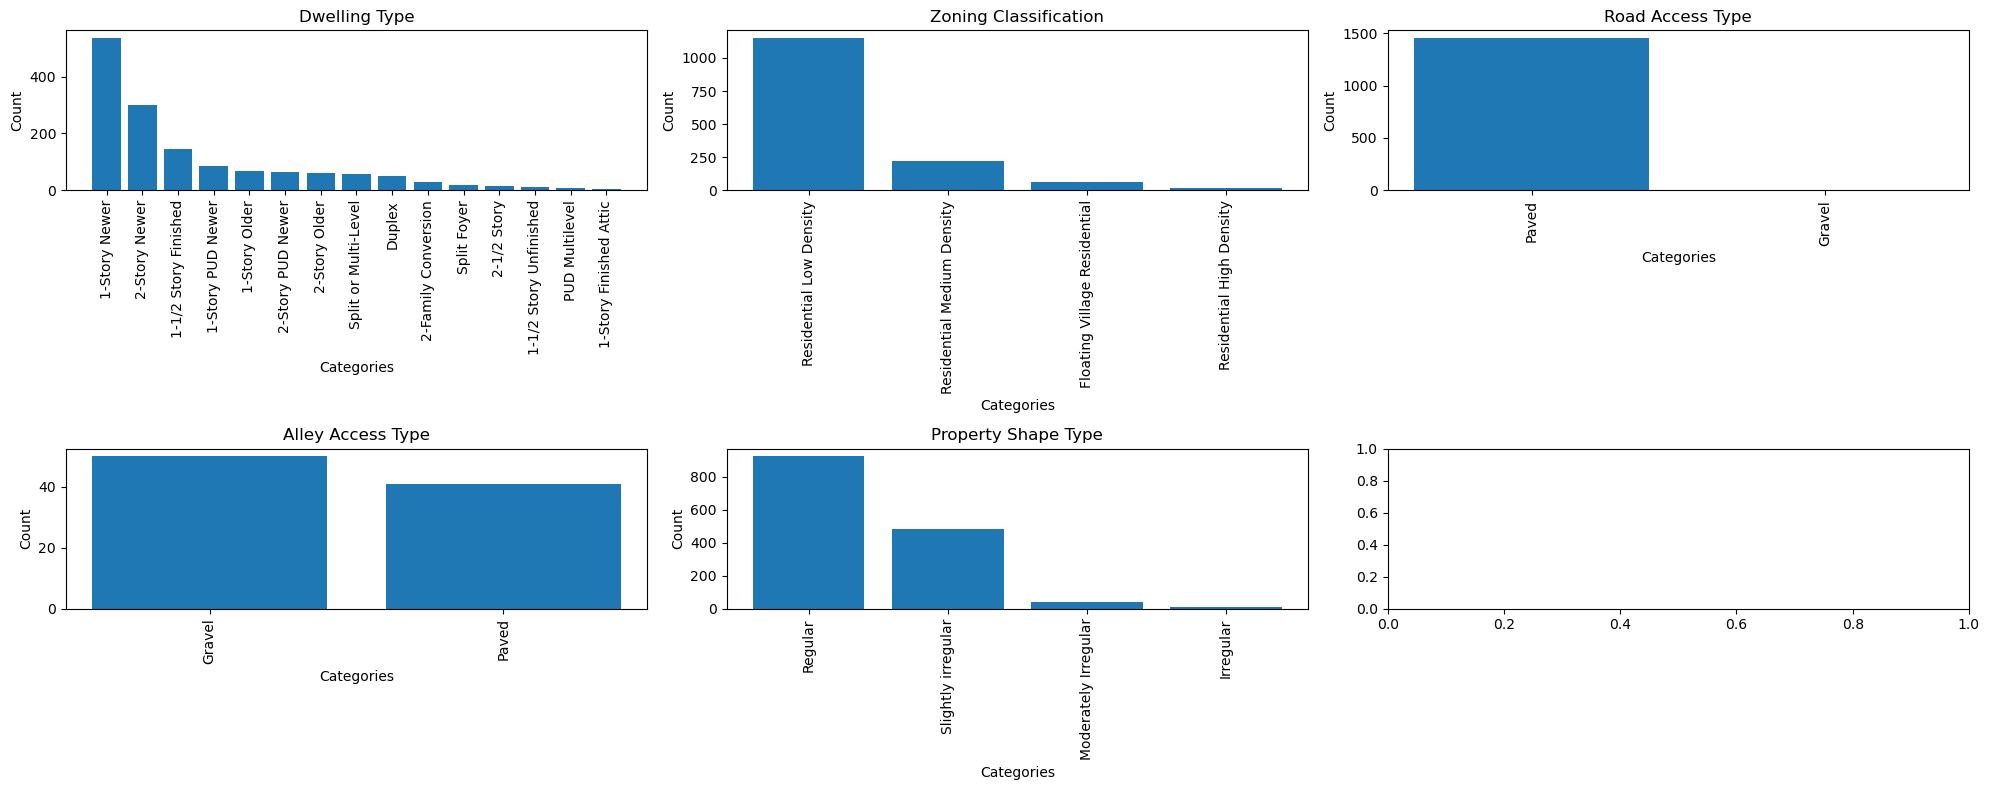

In [26]:
create_grouped_bar_chart(
                        [housingData['MSSubClass'],housingData['MSZoning'],housingData['Street'],housingData['Alley']
                         ,housingData['LotShape']], 
                         ["Dwelling Type" , "Zoning Classification","Road Access Type",
                           "Alley Access Type" , "Property Shape Type"]
                        )

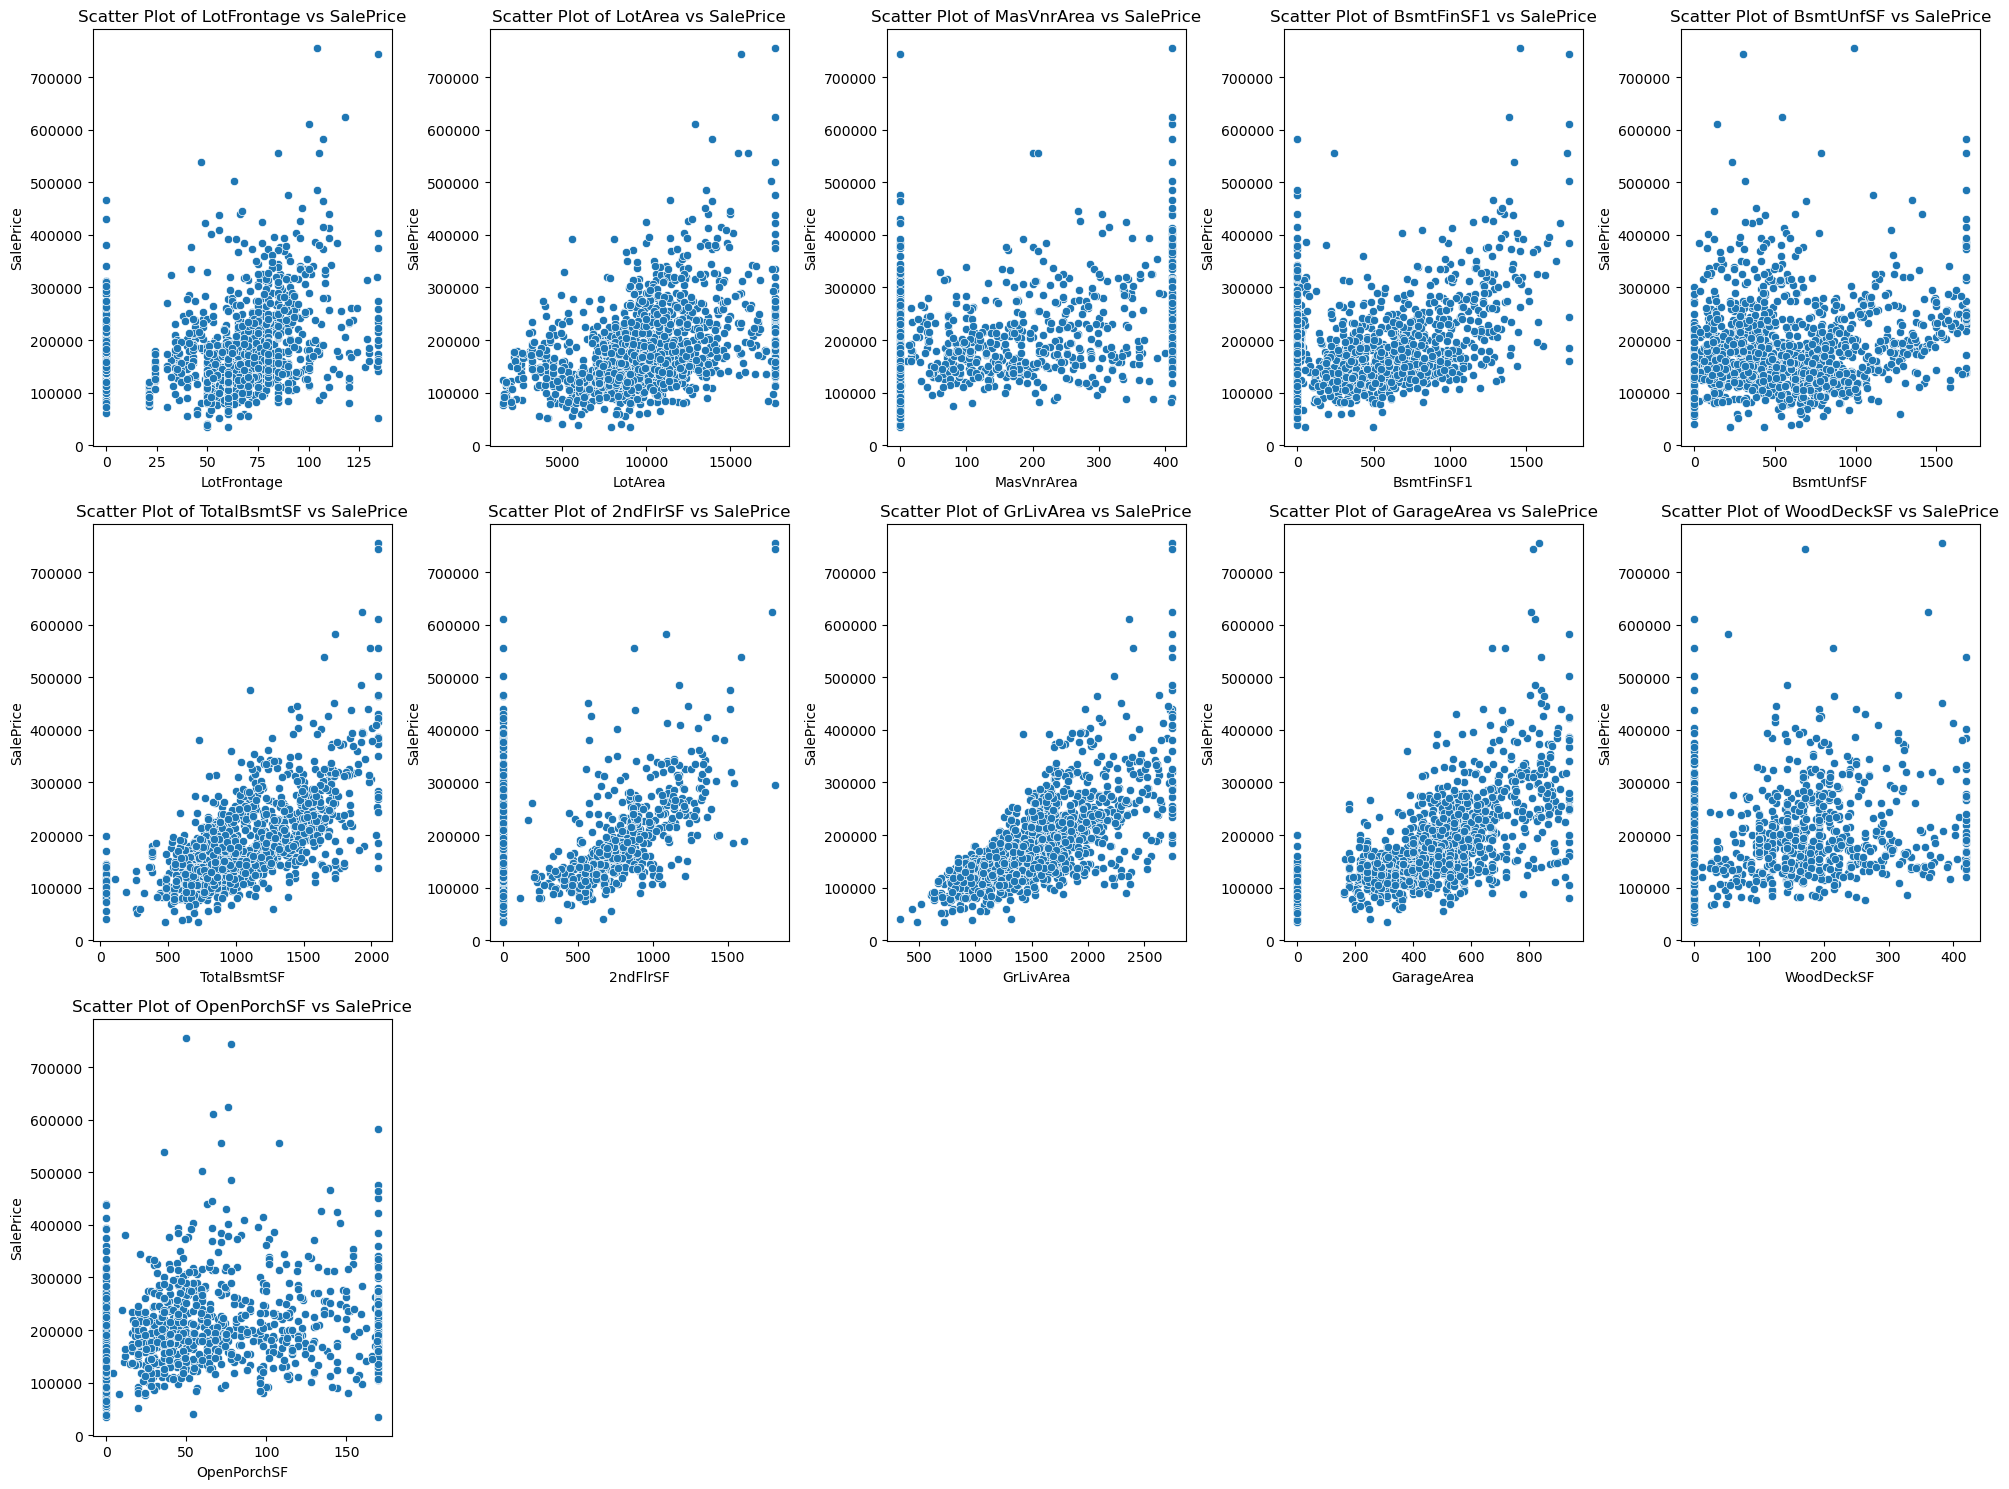

In [27]:
# Calculate the number of rows and columns needed
num_columns = 5
num_rows = math.ceil(len(housingData[numColumns].columns) / num_columns)

# Create the subplot grid
fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, num_rows * num_columns))

# Iterate over each column and create a separate scatter plot
for i, column in enumerate(housingData[numColumns].columns):
    row = i // num_columns
    col = i % num_columns
    
    # Select the appropriate subplot
    if num_rows > 1:
        ax = axes[row][col]
    else:
        ax = axes[col]
    
    # Create the scatter plot using seaborn
    sns.scatterplot(data=housingData[numColumns], x=column, y=housingData['SalePrice'], ax=ax)
    ax.set_title(f'Scatter Plot of {column} vs SalePrice')

# Remove any empty subplots
if len(housingData[numColumns].columns) < num_rows * num_columns:
    empty_subplots = num_rows * num_columns - len(housingData[numColumns].columns)
    if num_rows > 1:
        for i in range(empty_subplots):
            fig.delaxes(axes[-1][-1 - i])
    else:
        for i in range(empty_subplots):
            fig.delaxes(axes[-1 - i])

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


- There is a pattern visible for almost all the numerical fields selected
- As the Area of the property is increasing , the sale price is going up 

### Derived Column 

In [37]:
import datetime
## There is an information in column YearBuilt, it would be intresting to know how much age of the property has impact on 
## our target variable "Sale Price"
current_year = datetime.datetime.now().year 
housingData['propertyAge'] = current_year - housingData['YearBuilt']

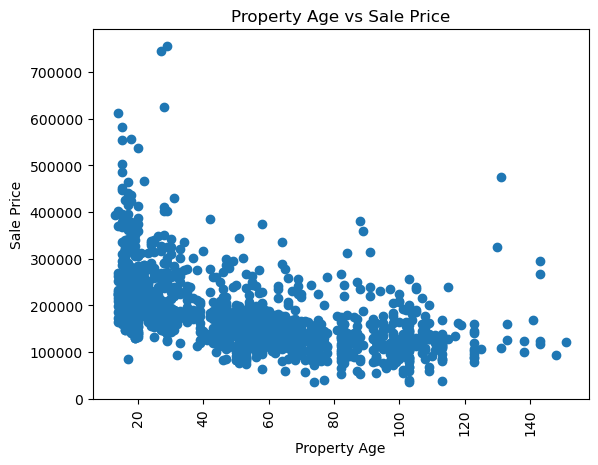

In [40]:
# Create the bar chart
plt.scatter(housingData['propertyAge'], housingData['SalePrice'])

# Set the axis labels and title
plt.xlabel('Property Age')
plt.ylabel('Sale Price')
plt.title('Property Age vs Sale Price')

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()


- As expected , it is visible in the plot above that newer propery have higher sale prices.
- As the age of propety is increasing , the sale price is getting reduced